[Reference](https://medium.com/@miguel.otero.pedrido.1993/hampel-filter-with-python-17db1d265375)

In [1]:
pip install hampel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 1.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for hampel: filename=hampel-1.0.2-cp310-cp310-linux_x86_64.whl size=209439 sha256=70b55b7d7566f75ebc021828a1648d12eb28083525226c51b77d634b54771db5
  Stored in directory: /root/.cache/pip/wheels/0e/c3/3c/8a9f55c3de0b09faf919393d4c6f09b11b7421dcaa7243b820
Successfully built hampel


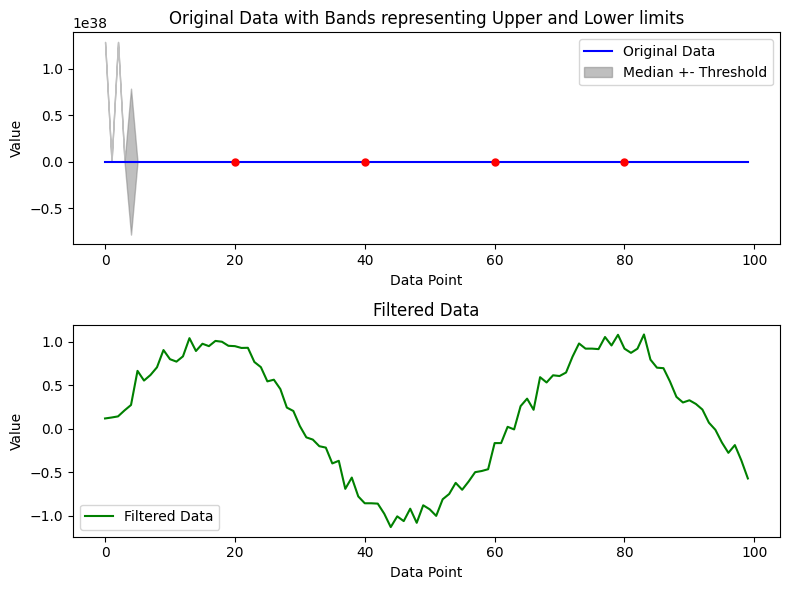

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from hampel import hampel

original_data = np.sin(np.linspace(0, 10, 100)) + np.random.normal(0, 0.1, 100)

# Add outliers to the original data
for index, value in zip([20, 40, 60, 80], [2.0, -1.9, 2.1, -0.5]):
    original_data[index] = value

result = hampel(original_data, window_size=10)

filtered_data = result.filtered_data
outlier_indices = result.outlier_indices
medians = result.medians
thresholds = result.thresholds

fig, axes = plt.subplots(2, 1, figsize=(8, 6))

# Plot the original data with estimated standard deviations in the first subplot
axes[0].plot(original_data, label='Original Data', color='b')
axes[0].fill_between(range(len(original_data)), medians + thresholds,
                     medians - thresholds, color='gray', alpha=0.5, label='Median +- Threshold')
axes[0].set_xlabel('Data Point')
axes[0].set_ylabel('Value')
axes[0].set_title('Original Data with Bands representing Upper and Lower limits')

for i in outlier_indices:
    axes[0].plot(i, original_data[i], 'ro', markersize=5)  # Mark as red

axes[0].legend()

# Plot the filtered data in the second subplot
axes[1].plot(filtered_data, label='Filtered Data', color='g')
axes[1].set_xlabel('Data Point')
axes[1].set_ylabel('Value')
axes[1].set_title('Filtered Data')
axes[1].legend()

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()